In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
disney_data = pd.read_csv(r'D:\MDSA Case Study\disney movie total gross.csv')
disney_data.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000,920608730


In [6]:
dup_all_mask = disney_data['Movie Title'].duplicated(keep=False)
dups_all = disney_data[dup_all_mask].sort_values('Movie Title')
dups_all

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
8,101 Dalmatians,25/01/1961,Comedy,G,153000000,1362870985
252,101 Dalmatians,27/11/1996,Comedy,G,136189294,258728898
196,Bad Company,20/01/1995,Thriller/Suspense,R,3523909,6829092
364,Bad Company,07/06/2002,Action,PG-13,30157016,43756218
4,Cinderella,15/02/1950,Drama,G,85000000,920608730
556,Cinderella,13/03/2015,Drama,PG,201151353,201151353
19,Freaky Friday,21/01/1977,Comedy,Unknown,25942000,98067733
386,Freaky Friday,06/08/2003,Comedy,PG,110222438,154090360
13,The Jungle Book,18/10/1967,Musical,Not Rated,141843000,789612346
194,The Jungle Book,25/12/1994,Adventure,PG,44342956,88930321


In [7]:
df = disney_data[['Genre', 'MPAA Rating', 'Inflation Adjusted Gross']].copy()
df

,Genre,MPAA Rating,Inflation Adjusted Gross
0,Musical,G,5228953251
1,Adventure,G,2188229052
2,Musical,G,2187090808
3,Adventure,G,1078510579
4,Drama,G,920608730
...,...,...,...
574,Drama,PG-13,12545979
575,Drama,PG,8874389
576,Adventure,PG-13,232532923
577,Adventure,PG,246082029


In [8]:
genre_mpaa_summary = (df.groupby(['Genre', 'MPAA Rating'], as_index=False)
      .agg(
          total_gross=('Inflation Adjusted Gross', 'sum'),
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
      .sort_values('total_gross', ascending=False)
)

In [9]:
genre_mpaa_summary

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
4,Adventure,G,10136004565,2.413334e+08,42
5,Adventure,PG,8625757598,1.513291e+08,57
28,Musical,G,8411443732,9.346049e+08,9
12,Comedy,PG,6857455790,8.905787e+07,77
6,Adventure,PG-13,4550807668,2.676946e+08,17
10,Comedy,G,3696144679,2.174203e+08,17
1,Action,PG-13,3516434321,1.850755e+08,19
20,Drama,G,2365890695,4.731781e+08,5
21,Drama,PG,2148006304,7.671451e+07,28
22,Drama,PG-13,2091952069,5.653925e+07,37


In [10]:
genre_mpaa_summary_asc = (df.groupby(['Genre', 'MPAA Rating'], as_index=False)
      .agg(
          total_gross=('Inflation Adjusted Gross', 'sum'),
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
      .sort_values('total_gross', ascending=True)
)
genre_mpaa_summary_asc

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
18,Documentary,Not Rated,426246,4.262460e+05,1
42,Unknown,PG,5877699,2.938850e+06,2
19,Documentary,PG,8086157,1.617231e+06,5
31,Musical,PG-13,11468231,1.146823e+07,1
44,Unknown,R,14730118,3.682530e+06,4
27,Horror,Unknown,15136765,1.513676e+07,1
46,Western,PG,15983331,1.598333e+07,1
41,Thriller/Suspense,Unknown,26062188,2.606219e+07,1
38,Thriller/Suspense,PG,27569558,2.756956e+07,1
43,Unknown,PG-13,28692474,7.173118e+06,4


In [11]:
min_movies = 5
genre_mpaa_summary_asc = genre_mpaa_summary[genre_mpaa_summary['movie_count'] >= min_movies] \
    .sort_values('total_gross', ascending=False)

genre_mpaa_summary_asc

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
4,Adventure,G,10136004565,2.413334e+08,42
5,Adventure,PG,8625757598,1.513291e+08,57
28,Musical,G,8411443732,9.346049e+08,9
12,Comedy,PG,6857455790,8.905787e+07,77
6,Adventure,PG-13,4550807668,2.676946e+08,17
10,Comedy,G,3696144679,2.174203e+08,17
1,Action,PG-13,3516434321,1.850755e+08,19
20,Drama,G,2365890695,4.731781e+08,5
21,Drama,PG,2148006304,7.671451e+07,28
22,Drama,PG-13,2091952069,5.653925e+07,37


In [12]:
# From the above table, its clear that top Genres are Adventure(G/PG), Musical(G), Comedy(G/PG), Action(PG13) and Drama(G/PG/PG13).
# MPAA ratings that are most common are G, PG and PG-13  

In [13]:
min_movies = 5
genre_mpaa_summary1 = genre_mpaa_summary[genre_mpaa_summary['movie_count'] >= min_movies] \
    .sort_values('total_gross', ascending=True)

genre_mpaa_summary1

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
19,Documentary,PG,8086157,1.617231e+06,5
17,Documentary,G,194976015,1.949760e+07,10
24,Drama,Unknown,228129146,2.073901e+07,11
45,Unknown,Unknown,318303093,4.547187e+07,7
40,Thriller/Suspense,R,341487362,3.794304e+07,9
0,Action,PG,426165810,8.523316e+07,5
34,Romantic Comedy,PG,519609816,7.422997e+07,7
35,Romantic Comedy,PG-13,690588727,5.754906e+07,12
8,Adventure,Unknown,1096836934,1.096837e+08,10
15,Comedy,Unknown,1265203457,6.326017e+07,20


In [14]:
# From the above table we can see that least successful genres are Documentary(G/PG), Thriller(R), RomCom(PG/PG13)
# But this data is only till 2016 so its not enough to get a clear idea will see what the latest data has to say about it.

<Axes: xlabel='Movie Title'>

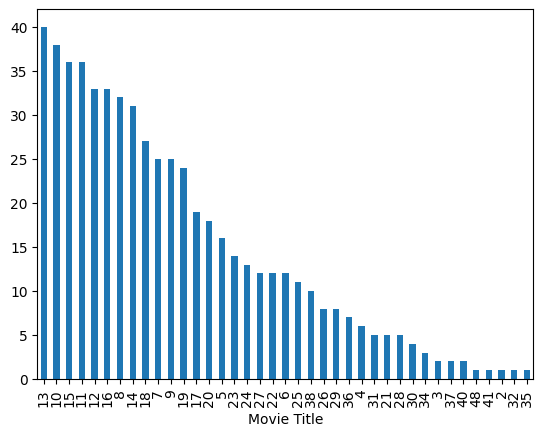

In [ ]:
disney_data["Movie Title"].str.len().value_counts().plot(kind='bar')

In [17]:
df['title_length'] = disney_data["Movie Title"].str.len()

In [19]:
# 5-character buckets: 0-4, 5-9, 10-14, ...
max_len = int(df['title_length'].max())
bins = list(range(0, max_len + 6, 5))

df['title_len_bin'] = pd.cut(df['title_length'], bins=bins, right=False)

bin_summary = (
    df.groupby('title_len_bin', as_index=False)
      .agg(
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          median_gross=('Inflation Adjusted Gross', 'median'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
)

print(bin_summary)

  title_len_bin     avg_gross  median_gross  movie_count
0        [0, 5)  1.154884e+08    77184895.0            9
1       [5, 10)  1.273685e+08    51107153.0          110
2      [10, 15)  1.091370e+08    50951333.0          178
3      [15, 20)  9.684751e+07    49999822.0          139
4      [20, 25)  9.676824e+07    66794469.0           62
5      [25, 30)  9.802821e+07    55037362.5           44
6      [30, 35)  4.669919e+08    77042381.0           13
7      [35, 40)  2.054991e+08    80914668.0           20
8      [40, 45)  9.850784e+07   129164207.0            3
9      [45, 50)  3.610782e+07    36107823.0            1


C:\Users\Kris\AppData\Local\Temp\ipykernel_30012\3575042761.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('title_len_bin', as_index=False)


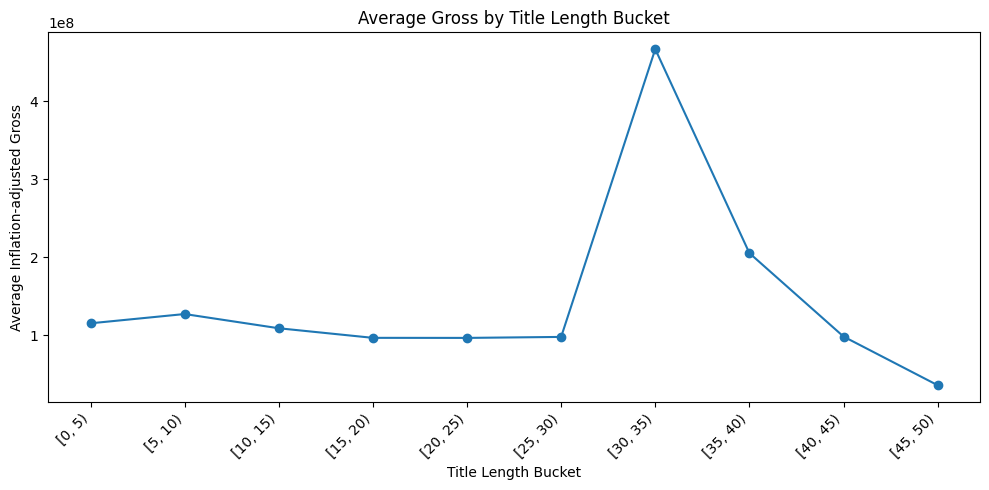

In [20]:
plt.figure(figsize=(10,5))
plt.plot(bin_summary['title_len_bin'].astype(str), bin_summary['avg_gross'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title Length Bucket')
plt.ylabel('Average Inflation-adjusted Gross')
plt.title('Average Gross by Title Length Bucket')
plt.tight_layout()
plt.show()

In [21]:
pearson_corr = df['title_length'].corr(df['Inflation Adjusted Gross'], method='pearson')
spearman_corr = df['title_length'].corr(df['Inflation Adjusted Gross'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.05977562687608895
Spearman correlation: 0.016012590412711435


In [22]:
all_movies = pd.read_csv(r'D:\MDSA Case Study\enhanced_box_office_data(2000-2024)u.csv')

In [23]:
all_movies.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America
